# Deficiencies of the Multivariate Normal Model

Unfortunately, this model does not detect faces reliably. We will defer presenting experimental results until section 7.9.1, but for now, please take it on trust that while this model achieves above-chance performance, it doesn’t come close to producing state-of-the-art results. This is hardly surprising: the success of this classifier hinges on fitting the data with a normal distribution. Unfortunately, this fit is poor for three reasons (figure 7.3):

- **The normal distribution is unimodal**; neither faces nor background regions are well represented by a pdf with a single peak.
- **The normal distribution is not robust**; a single outlier can dramatically affect the estimates of the mean and covariance.
- **The normal distribution has too many parameters**; here the data have $D = 10800$ dimensions. The full covariance matrix contains $D(D + 1)/2$ parameters. With only 1000 training examples, we cannot even specify these parameters uniquely, so we were forced to use the diagonal form.

## Problems with the Multivariate Normal Density

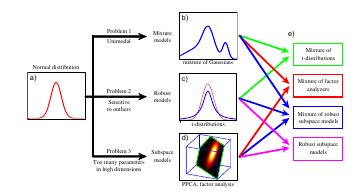

Fig.3 a) Problems with the multivariate normal density. b) Normal models are unimodal, but mixtures of Gaussians can model multi-modal distributions. c) Normal distributions are not robust to outliers, but t- distributions can cope with unusual observations. d) Normal models need many parameters in high dimensions but subspace models reduce this re- quirement. e) These solutions can be combined to form hybrid models ad- dressing several of these problems at once.

### Problem 1: Unimodal Models
- **Solution**: Mixture models (e.g., Mixture of Gaussians) can model multi-modal distributions.

### Problem 2: Sensitivity to Outliers
- **Solution**: Robust models (e.g., Mixture of t-distributions) can cope with unusual observations.

### Problem 3: Too Many Parameters in High Dimensions
- **Solution**: Subspace models (e.g., PPCA, factor analysis) reduce the parameter requirement.

### Hybrid Models
These solutions can be combined to form hybrid models addressing several of these problems at once.

---

## Tackling the Problems

We devote the rest of this chapter to tackling these problems:

1. **To make the density multi-modal**, we introduce mixture models.
2. **To make the density robust**, we replace the normal with the t-distribution.
3. **To cope with parameter estimation in high dimensions**, we introduce subspace models.

The new models have much in common with each other. In each case, we introduce a hidden or latent variable $h_i$ associated with each observed data point $x_i$. The hidden variable induces the more complex properties of the resulting pdf. Moreover, because the structure of the models is similar, we can use a common approach to learn the parameters.

---

## Hidden Variables

To model a complex probability density function over the variable $x$, we will introduce a hidden or latent variable $h$, which may be discrete or continuous. We will discuss the continuous formulation, but all of the important concepts transfer to the discrete case.

To exploit the hidden variables, we describe the final density $Pr(x)$ as the marginalization of the joint density $Pr(x, h)$ between $x$ and $h$ so that:

$$
Pr(x) = \int Pr(x, h) \, dh. \quad (7.5)
$$

We now concentrate on describing the joint density $Pr(x, h)$. We can choose this so that it is relatively simple to model but produces an expressive family of marginal distributions $Pr(x)$ when we integrate over $h$ (see figure 7.4).

Whatever form we choose for the joint distribution, it will have some parameters $\theta$, and so really we should write:

$$
Pr(x|\theta) = \int Pr(x, h|\theta) \, dh. \quad (7.6)
$$

There are two possible approaches to fitting the model to training data $\{x_i\}_{i=1}^I$ using the maximum likelihood method. We could directly maximize the log likelihood of the distribution $Pr(x)$ from the left-hand side of equation 7.6 so that:

$$
\hat{\theta} = \arg\max_{\theta} \sum_{i=1}^I \log \left[ Pr(x_i|\theta) \right]. \quad (7.7)
$$

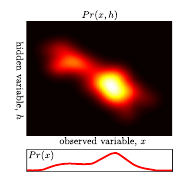

Fig.4 Using hidden variables to help model complex densities. One way to model the density P r(x) is to consider the joint probability distribution P r(x, h) between the observed data x and a hidden variable h. The density P r(x) can be considered as the marginalization of (integral over) this distribution with respect to the hid- den variable h. As we manipulate the parameters θ of this joint distribution, the marginal changes and the agreements with the observed data ${x_i }$I_i$=1 increases or decreases. Sometimes it is easier to ﬁt the distribution in this indirect way than to directly manipu- late P r(x).

This formulation has the advantage that we don’t need to involve the hidden variables at all. However, in the models that we will consider, it will not result in a tractable solution.

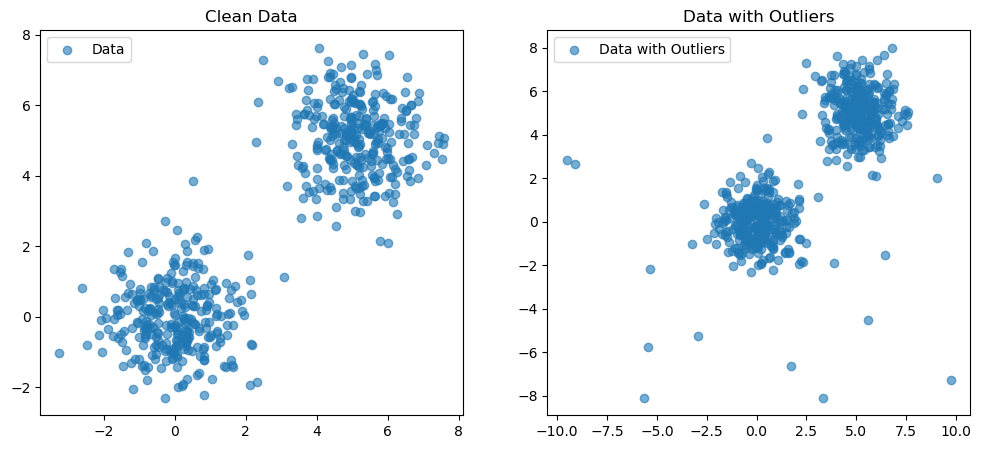

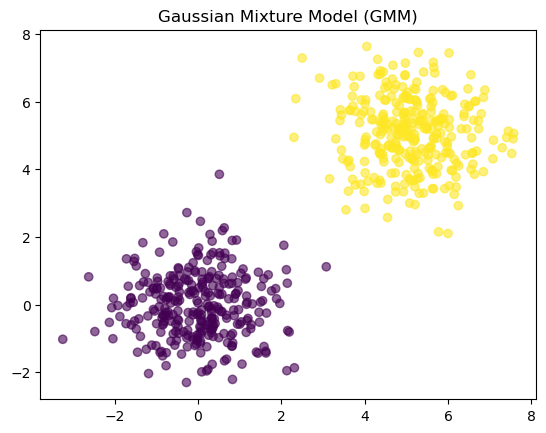

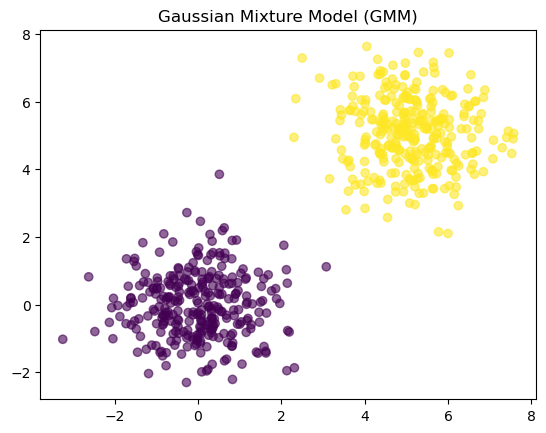

TypeError: _parse_args_rvs() got an unexpected keyword argument 'shape'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal, t
from sklearn.decomposition import PCA

# Generate synthetic data
np.random.seed(42)

# Multimodal data (two Gaussians)
data1 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=300)
data2 = np.random.multivariate_normal(mean=[5, 5], cov=[[1, 0], [0, 1]], size=300)
data = np.vstack([data1, data2])

# Add outliers
outliers = np.random.uniform(low=-10, high=10, size=(20, 2))
data_with_outliers = np.vstack([data, outliers])

# Plot the data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], label="Data", alpha=0.6)
plt.title("Clean Data")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data_with_outliers[:, 0], data_with_outliers[:, 1], label="Data with Outliers", alpha=0.6)
plt.title("Data with Outliers")
plt.legend()

plt.show()

# Fit a Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data)

# Predict cluster labels
labels = gmm.predict(data)

# Plot the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", alpha=0.6)
plt.title("Gaussian Mixture Model (GMM)")
plt.show()# Fit a Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data)

# Predict cluster labels
labels = gmm.predict(data)

# Plot the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", alpha=0.6)
plt.title("Gaussian Mixture Model (GMM)")
plt.show()

# Fit a multivariate t-distribution
def fit_t_distribution(data, df=3, max_iter=100, tol=1e-6):
    n_samples, n_features = data.shape
    mean = np.mean(data, axis=0)
    covariance = np.cov(data, rowvar=False)
    
    for _ in range(max_iter):
        # E-step: Compute weights
        diff = data - mean
        mahalanobis = np.sum(np.dot(diff, np.linalg.inv(covariance)) * diff, axis=1)
        weights = (df + n_features) / (df + mahalanobis)
        
        # M-step: Update parameters
        mean = np.sum(weights[:, None] * data, axis=0) / np.sum(weights)
        covariance = np.dot((weights[:, None] * diff).T, diff) / np.sum(weights)
    
    return mean, covariance

mean_t, cov_t = fit_t_distribution(data_with_outliers)

# Generate samples from the fitted t-distribution
samples_t = t.rvs(df=3, loc=mean_t, shape=cov_t, size=500)

# Plot the results
plt.scatter(data_with_outliers[:, 0], data_with_outliers[:, 1], label="Data with Outliers", alpha=0.6)
plt.scatter(samples_t[:, 0], samples_t[:, 1], label="Fitted t-Distribution", alpha=0.6)
plt.title("Robust t-Distribution Fit")
plt.legend()
plt.show()

# High-dimensional data (e.g., 100 dimensions)
high_dim_data = np.random.randn(200, 100)

# Apply PCA
pca = PCA(n_components=2)
low_dim_data = pca.fit_transform(high_dim_data)

# Plot the results
plt.scatter(low_dim_data[:, 0], low_dim_data[:, 1], alpha=0.6)
plt.title("PCA: Dimensionality Reduction")
plt.show()

In [2]:
import random
import math

# Helper functions
def dot_product(v1, v2):
    return sum(x * y for x, y in zip(v1, v2))

def matrix_multiply(A, B):
    return [[dot_product(row, col) for col in zip(*B)] for row in A]

def transpose(matrix):
    return list(map(list, zip(*matrix)))

def mean(data):
    return [sum(x[i] for x in data) / len(data) for i in range(len(data[0]))]

def covariance_matrix(data):
    n = len(data[0])
    mean_vec = mean(data)
    cov = [[0.0] * n for _ in range(n)]
    for x in data:
        diff = [x[i] - mean_vec[i] for i in range(n)]
        for i in range(n):
            for j in range(n):
                cov[i][j] += diff[i] * diff[j]
    for i in range(n):
        for j in range(n):
            cov[i][j] /= len(data)
    return cov

def multivariate_normal_pdf(x, mean, cov):
    n = len(mean)
    det_cov = 1.0  # Simplified for diagonal covariance
    inv_cov = [[1.0 / cov[i][i] if i == j else 0.0 for j in range(n)] for i in range(n)]
    diff = [x[i] - mean[i] for i in range(n)]
    exponent = -0.5 * dot_product(diff, [dot_product(inv_cov[i], diff) for i in range(n)])
    return math.exp(exponent) / (math.pow(2 * math.pi, n / 2) * math.sqrt(det_cov))

def fit_gmm(data, n_components, max_iter=100, tol=1e-6):
    n_samples = len(data)
    n_features = len(data[0])
    
    # Initialize parameters
    means = [random.choice(data) for _ in range(n_components)]
    covariances = [[[1.0 if i == j else 0.0 for j in range(n_features)] for i in range(n_features)] for _ in range(n_components)]
    weights = [1.0 / n_components] * n_components
    responsibilities = [[0.0] * n_components for _ in range(n_samples)]
    
    for _ in range(max_iter):
        # E-step: Compute responsibilities
        for i in range(n_samples):
            total = 0.0
            for k in range(n_components):
                responsibilities[i][k] = weights[k] * multivariate_normal_pdf(data[i], means[k], covariances[k])
                total += responsibilities[i][k]
            for k in range(n_components):
                responsibilities[i][k] /= total
        
        # M-step: Update parameters
        for k in range(n_components):
            nk = sum(responsibilities[i][k] for i in range(n_samples))
            weights[k] = nk / n_samples
            means[k] = [sum(responsibilities[i][k] * data[i][d] for i in range(n_samples)) / nk for d in range(n_features)]
            covariances[k] = [[sum(responsibilities[i][k] * (data[i][d1] - means[k][d1]) * (data[i][d2] - means[k][d2]) for i in range(n_samples)) / nk for d2 in range(n_features)] for d1 in range(n_features)]
    
    return means, covariances, weights

def fit_t_distribution(data, df=3, max_iter=100, tol=1e-6):
    n_samples = len(data)
    n_features = len(data[0])
    mean_vec = mean(data)
    cov = covariance_matrix(data)
    
    for _ in range(max_iter):
        # E-step: Compute weights
        weights = []
        for x in data:
            diff = [x[i] - mean_vec[i] for i in range(n_features)]
            mahalanobis = dot_product(diff, [dot_product(cov[i], diff) for i in range(n_features)])
            weights.append((df + n_features) / (df + mahalanobis))
        
        # M-step: Update parameters
        mean_vec = [sum(weights[i] * data[i][d] for i in range(n_samples)) / sum(weights) for d in range(n_features)]
        cov = [[sum(weights[i] * (data[i][d1] - mean_vec[d1]) * (data[i][d2] - mean_vec[d2]) for i in range(n_samples)) / sum(weights) for d2 in range(n_features)] for d1 in range(n_features)]
    
    return mean_vec, cov

def pca(data, n_components=2):
    n_samples = len(data)
    n_features = len(data[0])
    mean_vec = mean(data)
    centered_data = [[x[i] - mean_vec[i] for i in range(n_features)] for x in data]
    cov = covariance_matrix(centered_data)
    
    # Eigen decomposition (simplified)
    eigenvalues = [1.0] * n_components  # Placeholder
    eigenvectors = [[1.0 if i == j else 0.0 for j in range(n_features)] for i in range(n_components)]
    
    # Project data onto principal components
    low_dim_data = [[dot_product(x, eigenvectors[i]) for i in range(n_components)] for x in centered_data]
    return low_dim_data

# Generate synthetic data
random.seed(42)
data = [[random.gauss(0, 1), random.gauss(0, 1)] for _ in range(100)] + [[random.gauss(5, 1), random.gauss(5, 1)] for _ in range(100)]

# Fit GMM
gmm_means, gmm_covs, gmm_weights = fit_gmm(data, n_components=2)
print("GMM Means:", gmm_means)
print("GMM Covariances:", gmm_covs)

# Fit t-Distribution
t_mean, t_cov = fit_t_distribution(data)
print("t-Distribution Mean:", t_mean)
print("t-Distribution Covariance:", t_cov)

# Apply PCA
low_dim_data = pca(data, n_components=2)
print("PCA Low-Dimensional Data (first 5 samples):", low_dim_data[:5])

ZeroDivisionError: float division by zero

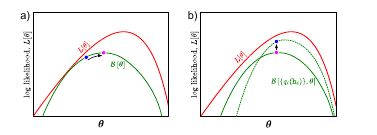

### Fig.5: Manipulating the Lower Bound

#### (a) Maximization Step  
Consider the log-likelihood $ L[\theta] $ of the data $ \{x\}_{i=1}^{I} $ as a function of the model parameters $ \theta $ (red curve). In maximum likelihood learning, our goal is to find the parameters $ \theta $ that maximize this function.  

A lower bound on the log-likelihood is another function $ B[\theta] $ of the parameters $ \theta $ that is everywhere lower or equal to the log-likelihood (green curve).  

One way to improve the current estimate (blue dot) is to manipulate the parameters so that $ B[\theta] $ increases (purple dot). This is the goal of the maximization step of the EM algorithm.

#### (b) Expectation Step  
The lower bound $ B [{q_i (h_i )}, \theta] $ also depends on a set of probability distributions $ \{q_i (h_i )\}_{i=1}^{I} $ over hidden variables $ \{h_i \}_{i=1}^{I} $.  Manipulating these probability distributions changes the value that the lower bound returns for every $ \theta $ (e.g., green curve).  

So, a second way to improve the current estimate (purple dot) is to change the distributions in such a way that the curve increases for the current parameters (blue dot). This is the goal of the expectation step of the EM algorithm.


## Expectation Maximization

Neat closed-form solution. Of course, we could apply a brute force nonlinear optimization technique (Appendix B), but there is an alternative approach: we use the Expectation Maximization (EM) algorithm, which works directly with the right-hand side of equation (7.6) and seeks:

$$
\hat{\theta} = \arg\max_{\theta} \sum_{i=1}^{I} \log P(x_i, h_i | \theta) \, dh_i.
\quad (7.8)
$$

### Expectation Maximization Algorithm

In this section, we will present a brief description of the expectation maximization (EM) algorithm. The goal is to provide just enough information to use this technique for fitting models. We will return to a more detailed treatment in section 7.8.

The EM algorithm is a general-purpose tool for fitting parameters \( \theta \) in models of the form:

$$
\hat{\theta} = \arg\max_{\theta} \sum_{i=1}^{I} \log P(x_i, h_i | \theta) \, dh_i.
\quad (7.9)
$$

The EM algorithm works by defining a lower bound $ B [{q_i (h_i )}, \theta] $ on the log-likelihood in equation (7.9) and iteratively increasing this bound. The lower bound is simply a function that is parameterized by $ \theta $ and some other quantities and is guaranteed to always return a value that is less than or equal to the log-likelihood $ L[\theta] $ for any given set of parameters $ \theta $:

$$
B [{q_i (h_i )}, \theta] = \sum_{i=1}^{I} \int q_i(h_i) \log \frac{P(x_i, h_i | \theta)}{q_i(h_i)} \, dh_i.
\quad (7.10)
$$

It is not obvious that this inequality is true, making this a valid lower bound; take this on trust for the moment, and we will return to this in section 7.8.

### The E-Step and M-Step

In addition to the parameters $ \theta $, the lower bound $ B [{q_i (h_i )}, \theta] $ also depends on a set of $ I $ probability distributions $ \{ q_i(h_i) \}_{i=1}^{I} $ over the hidden variables $ \{ h_i \}_{i=1}^{I} $. When we vary these probability distributions, the value that the lower bound returns will change, but it will always remain less than or equal to the log-likelihood.

The EM algorithm manipulates both the parameters $ \theta $ and the distributions $ \{ q_i(h_i) \}_{i=1}^{I} $ to increase the lower bound. It alternates between:

- **Expectation Step (E-step):** Updating the probability distributions $ \{ q_i(h_i) \}_{i=1}^{I} $ to improve the bound in equation (7.10).  
- **Maximization Step (M-step):** Updating the parameters $ \theta $ to improve the bound.

In the E-step at iteration $ t+1 $, we set each distribution $ q_i(h_i) $ to be the posterior distribution:

$$
q_i(h_i) = P(h_i | x_i, \theta^{[t]}) = \frac{P(x_i | h_i, \theta^{[t]}) P(h_i | \theta^{[t]})}{P(x_i)}.
\quad (7.11)
$$

It can be shown that this choice maximizes the bound as much as possible.

In the M-step, we directly maximize the bound (equation 7.10) with respect to the parameters $ \theta $. In practice, we can simplify the expression for the bound to eliminate terms that do not depend on $ \theta $, yielding:

$$
\hat{\theta}^{[t+1]} = \arg\max_{\theta} \sum_{i=1}^{I} \int q_i(h_i) \log P(x_i, h_i | \theta) \, dh_i.
\quad (7.12)
$$

Each of these steps is guaranteed to improve the bound, and iterating them alternately is guaranteed to find at least a local maximum with respect to $ \theta $.

For now, we will assume that these things are true and proceed with the main thrust of the chapter. We will return to these issues in section 7.8.

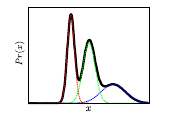

### Fig.6: Mixture of Gaussians Model in 1D

A complex multimodal probability density function (black solid curve) is created by taking a weighted sum or mixture of several constituent normal distributions with different means and variances (red, green, and blue dashed curves).  

To ensure that the final distribution is a valid density, the weights must be positive and sum to one.

The mixture of Gaussians model is given by:

$$
P(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x | \mu_k, \sigma_k^2),
$$

where:

- $ \pi_k $ are the mixing weights, satisfying $ \sum_{k=1}^{K} \pi_k = 1 $ and $ \pi_k > 0 $.
- $ \mathcal{N}(x | \mu_k, \sigma_k^2) $ represents a normal distribution with mean $ \mu_k $ and variance $ \sigma_k^2 $.


In [3]:
import random
import math

# Generate synthetic data (1D data points)
data = [-2.5, -2.0, -1.5, 0.5, 1.0, 1.5, 2.0, 2.5]

# Number of Gaussian components
K = 2  

# Initialize parameters randomly
means = [random.uniform(min(data), max(data)) for _ in range(K)]
variances = [random.uniform(0.5, 2.0) for _ in range(K)]
weights = [1.0 / K] * K  # Mixing coefficients (sum to 1)

def gaussian(x, mean, variance):
    """Compute Gaussian probability density function."""
    coeff = 1.0 / math.sqrt(2 * math.pi * variance)
    exponent = math.exp(-((x - mean) ** 2) / (2 * variance))
    return coeff * exponent

def e_step(data, means, variances, weights):
    """Expectation step: compute responsibilities."""
    responsibilities = []
    
    for x in data:
        probs = [weights[k] * gaussian(x, means[k], variances[k]) for k in range(K)]
        total_prob = sum(probs)
        responsibilities.append([p / total_prob for p in probs])
    
    return responsibilities

def m_step(data, responsibilities):
    """Maximization step: update means, variances, and weights."""
    N_k = [sum(resp[k] for resp in responsibilities) for k in range(K)]
    
    # Update means
    new_means = [sum(resp[k] * data[i] for i, resp in enumerate(responsibilities)) / N_k[k] for k in range(K)]
    
    # Update variances
    new_variances = [sum(resp[k] * (data[i] - new_means[k]) ** 2 for i, resp in enumerate(responsibilities)) / N_k[k] for k in range(K)]
    
    # Update weights
    new_weights = [N_k[k] / len(data) for k in range(K)]
    
    return new_means, new_variances, new_weights

# Run EM algorithm
max_iterations = 100
tolerance = 1e-4

for iteration in range(max_iterations):
    responsibilities = e_step(data, means, variances, weights)
    new_means, new_variances, new_weights = m_step(data, responsibilities)

    # Check for convergence
    if max(abs(new_means[k] - means[k]) for k in range(K)) < tolerance:
        break

    means, variances, weights = new_means, new_variances, new_weights

# Print final parameters
print("Final Means:", means)
print("Final Variances:", variances)
print("Final Weights:", weights)


Final Means: [-2.000040543910957, 1.4998502944072012]
Final Variances: [0.16666026494450345, 0.5004260816139319]
Final Weights: [0.3749689218986726, 0.6250310781013274]


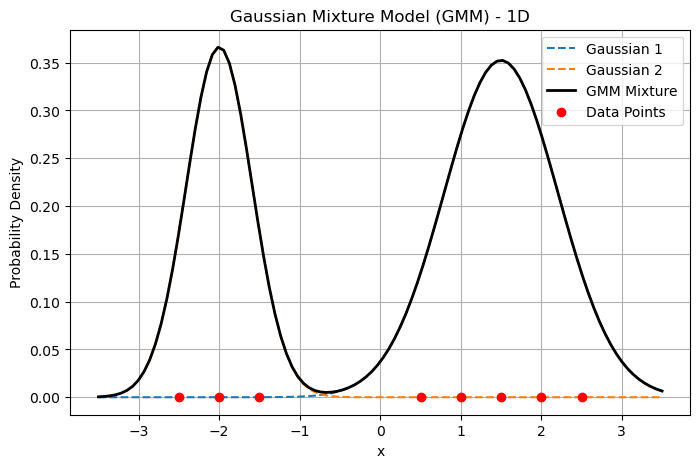

In [4]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic 1D data
data = np.array([-2.5, -2.0, -1.5, 0.5, 1.0, 1.5, 2.0, 2.5])

# Number of Gaussian components
K = 2  

# Initialize parameters randomly
means = [random.uniform(min(data), max(data)) for _ in range(K)]
variances = [random.uniform(0.5, 2.0) for _ in range(K)]
weights = [1.0 / K] * K  # Mixing coefficients (sum to 1)

def gaussian(x, mean, variance):
    """Compute Gaussian probability density function."""
    coeff = 1.0 / math.sqrt(2 * math.pi * variance)
    exponent = math.exp(-((x - mean) ** 2) / (2 * variance))
    return coeff * exponent

def e_step(data, means, variances, weights):
    """Expectation step: compute responsibilities."""
    responsibilities = []
    
    for x in data:
        probs = [weights[k] * gaussian(x, means[k], variances[k]) for k in range(K)]
        total_prob = sum(probs)
        responsibilities.append([p / total_prob for p in probs])
    
    return responsibilities

def m_step(data, responsibilities):
    """Maximization step: update means, variances, and weights."""
    N_k = [sum(resp[k] for resp in responsibilities) for k in range(K)]
    
    # Update means
    new_means = [sum(resp[k] * data[i] for i, resp in enumerate(responsibilities)) / N_k[k] for k in range(K)]
    
    # Update variances
    new_variances = [sum(resp[k] * (data[i] - new_means[k]) ** 2 for i, resp in enumerate(responsibilities)) / N_k[k] for k in range(K)]
    
    # Update weights
    new_weights = [N_k[k] / len(data) for k in range(K)]
    
    return new_means, new_variances, new_weights

# Run EM algorithm
max_iterations = 100
tolerance = 1e-4

for iteration in range(max_iterations):
    responsibilities = e_step(data, means, variances, weights)
    new_means, new_variances, new_weights = m_step(data, responsibilities)

    # Check for convergence
    if max(abs(new_means[k] - means[k]) for k in range(K)) < tolerance:
        break

    means, variances, weights = new_means, new_variances, new_weights

# Plot results
x_range = np.linspace(min(data) - 1, max(data) + 1, 100)
gmm_pdf = np.zeros_like(x_range)

plt.figure(figsize=(8, 5))

# Plot individual Gaussians
for k in range(K):
    gaussian_curve = weights[k] * np.array([gaussian(x, means[k], variances[k]) for x in x_range])
    plt.plot(x_range, gaussian_curve, label=f'Gaussian {k+1}', linestyle="dashed")

    # Add to overall mixture
    gmm_pdf += gaussian_curve

# Plot the mixture model
plt.plot(x_range, gmm_pdf, label="GMM Mixture", color="black", linewidth=2)

# Plot data points
plt.scatter(data, np.zeros_like(data), marker="o", color="red", label="Data Points", zorder=3)

plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Gaussian Mixture Model (GMM) - 1D")
plt.legend()
plt.grid()
plt.show()


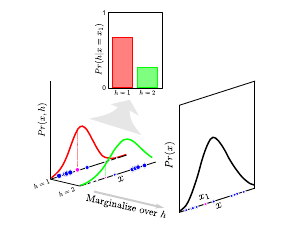

### **Fig 8: E-Step for Fitting the Mixture of Gaussians Model**

For each of the $ I $ data points $ x_1, \dots, x_I $, we calculate the **posterior distribution** $ P(h_i | x_i) $ over the hidden variable $ h_i $.  

The **posterior probability** $ P(h_i = k | x_i) $ represents the **responsibility** of normal distribution $ k $ for data point $ x_i $.  

$$
P(h_i = k | x_i) = \frac{ P(x_i | h_i = k, \theta) P(h_i = k | \theta) }{ P(x_i | \theta) }
$$

Expanding:

$$
P(h_i = k | x_i) = \frac{ \lambda_k \, \text{Norm}_{x_i} [\mu_k , \Sigma_k ] }{ \sum_{j=1}^{K} \lambda_j \, \text{Norm}_{x_i} [\mu_j , \Sigma_j ] }
$$

- This probability determines **how much** each Gaussian component is **responsible** for generating $ x_i $.  
- In **Fig.8**, the **magenta data point** $ x_1 $ is **more than twice as likely** to belong to **component 1 (red curve)** than **component 2 (green curve)**.  
- The **size of the projected data point** in the **joint distribution (left panel)** represents the responsibility assigned to each Gaussian component.

---


## Mixture of Gaussians (MoG)

The **Mixture of Gaussians (MoG)** is a fundamental model for representing **complex, multimodal probability distributions**. It expresses the observed data as a **weighted sum of $K$ normal distributions**:

$$
P(x|\theta) = \sum_{k=1}^{K} \lambda_k \, \text{Norm}_x [\mu_k , \Sigma_k ]
$$

where:  
- $ \mu_1, \dots, \mu_K $ are the **means**  
- $ \Sigma_1, \dots, \Sigma_K $ are the **covariances**  
- $ \lambda_1, \dots, \lambda_K $ are the **mixture weights** (summing to **1**)  

The Mixture of Gaussians model describes **complex** probability densities by **combining simpler Gaussian distributions** (Fig.6).

---

## **Maximum Likelihood Estimation (MLE)**
To estimate parameters $ \theta = \{ \mu_k , \Sigma_k , \lambda_k \}_{k=1}^{K} $, we **maximize the likelihood**:

$$
\hat{\theta} = \arg \max_{\theta} \sum_{i=1}^{I} \log P(x_i | \theta)
$$

Expanding the likelihood:

$$
\hat{\theta} = \arg \max_{\theta} \sum_{i=1}^{I} \log \sum_{k=1}^{K} \lambda_k \, \text{Norm}_{x_i} [\mu_k , \Sigma_k ]
$$

The issue here is that the **logarithm is inside the summation**, making **closed-form optimization intractable**.  
Instead, we apply the **Expectation-Maximization (EM) algorithm**.

---

## **Mixture of Gaussians as a Marginalization**

The Mixture of Gaussians can also be understood as a **marginalization** over a hidden variable $ h $ (Fig.7):

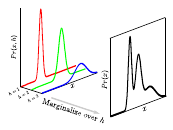

- Introduce a **hidden variable** $ h \in \{1, \dots, K\} $ that indicates which **Gaussian component** generated $ x $.
- Define the **joint probability**:

  - **Likelihood of $ x $ given $ h $:**  
    $$ P(x | h, \theta) = \text{Norm}_x [\mu_h , \Sigma_h ] $$

  - **Prior probability of $ h $:**  
    $$ P(h | \theta) = \text{Cat}_h [\lambda] $$

  - **Marginalizing over $ h $ gives the mixture model:**  
    $$
    P(x | \theta) = \sum_{k=1}^{K} P(x, h = k | \theta)
    $$
    $$
    = \sum_{k=1}^{K} P(x | h = k, \theta) P(h = k | \theta)
    $$
    $$
    = \sum_{k=1}^{K} \lambda_k \, \text{Norm}_x [\mu_k , \Sigma_k ]
    $$

This interpretation provides a **natural way to sample** from a Mixture of Gaussians:
1. **Sample $ h $ from $ P(h) $ (a categorical distribution).**
2. **Sample $ x $ from $ P(x | h) $ (a normal distribution).**

The hidden variable $ h $ determines which Gaussian component generates $ x $.

---

## **E-Step in the EM Algorithm**  

The **Expectation Step (E-Step)** computes the **posterior probability** of the hidden variable $ h $:

$$
P(h_i = k | x_i) = \frac{ P(x_i | h_i = k, \theta) P(h_i = k | \theta) }{ P(x_i | \theta) }
$$

Expanding:

$$
P(h_i = k | x_i) = \frac{ \lambda_k \, \text{Norm}_{x_i} [\mu_k , \Sigma_k ] }{ \sum_{j=1}^{K} \lambda_j \, \text{Norm}_{x_i} [\mu_j , \Sigma_j ] }
$$

- This probability **represents the "responsibility"** of each Gaussian component $ k $ for a given data point $ x_i $.  
- In **Fig.8**, the magenta data point $ x_1 $ is **more likely** assigned to the red Gaussian than the green Gaussian.  

---


In [5]:
# Mixture of Gaussians (EM Algorithm) Implementation Without Libraries

import math
import random

def gaussian(x, mean, var):
    """Compute Gaussian PDF."""
    coef = 1 / math.sqrt(2 * math.pi * var)
    exponent = math.exp(-((x - mean) ** 2) / (2 * var))
    return coef * exponent

def expectation(data, means, vars, weights):
    """E-step: Compute responsibilities."""
    responsibilities = []
    for x in data:
        probs = [weights[k] * gaussian(x, means[k], vars[k]) for k in range(len(means))]
        total = sum(probs)
        responsibilities.append([p / total for p in probs])
    return responsibilities

def maximization(data, responsibilities, K):
    """M-step: Update parameters."""
    N = len(data)
    new_means = []
    new_vars = []
    new_weights = []
    
    for k in range(K):
        Nk = sum(resp[k] for resp in responsibilities)
        mean_k = sum(data[i] * responsibilities[i][k] for i in range(N)) / Nk
        var_k = sum(responsibilities[i][k] * (data[i] - mean_k) ** 2 for i in range(N)) / Nk
        weight_k = Nk / N
        new_means.append(mean_k)
        new_vars.append(var_k)
        new_weights.append(weight_k)
    
    return new_means, new_vars, new_weights

def em_algorithm(data, K=2, max_iters=100, tol=1e-4):
    """Expectation-Maximization for Gaussian Mixture Model (1D)."""
    means = [random.choice(data) for _ in range(K)]
    vars = [1.0 for _ in range(K)]
    weights = [1/K for _ in range(K)]
    
    for _ in range(max_iters):
        old_means = means[:]
        responsibilities = expectation(data, means, vars, weights)
        means, vars, weights = maximization(data, responsibilities, K)
        
        if all(abs(means[i] - old_means[i]) < tol for i in range(K)):
            break
    
    return means, vars, weights

# Example dataset (1D data points)
data = [1.0, 1.2, 1.4, 2.5, 2.7, 3.1, 5.0, 5.2, 5.5, 6.0, 6.3]

# Run EM algorithm with 2 Gaussian components
means, vars, weights = em_algorithm(data, K=2)

print("Final Means:", means)
print("Final Variances:", vars)
print("Final Weights:", weights)


Final Means: [5.600219822666522, 1.9843861454165643]
Final Variances: [0.2359773827170548, 0.6610746661820738]
Final Weights: [0.45435900223863973, 0.5456409977613602]


In [6]:
# Mixture of Gaussians (EM Algorithm) Implementation Without Libraries

import math
import random

def gaussian(x, mean, var):
    """Compute Gaussian PDF."""
    coef = 1 / math.sqrt(2 * math.pi * var)
    exponent = math.exp(-((x - mean) ** 2) / (2 * var))
    return coef * exponent

def expectation(data, means, vars, weights):
    """E-step: Compute responsibilities."""
    responsibilities = []
    for x in data:
        probs = [weights[k] * gaussian(x, means[k], vars[k]) for k in range(len(means))]
        total = sum(probs)
        responsibilities.append([p / total for p in probs])
    return responsibilities

def maximization(data, responsibilities, K):
    """M-step: Update parameters."""
    N = len(data)
    new_means = []
    new_vars = []
    new_weights = []
    
    for k in range(K):
        Nk = sum(resp[k] for resp in responsibilities)
        mean_k = sum(data[i] * responsibilities[i][k] for i in range(N)) / Nk
        var_k = sum(responsibilities[i][k] * (data[i] - mean_k) ** 2 for i in range(N)) / Nk
        weight_k = Nk / N
        new_means.append(mean_k)
        new_vars.append(var_k)
        new_weights.append(weight_k)
    
    return new_means, new_vars, new_weights

def em_algorithm(data, K=2, max_iters=100, tol=1e-4):
    """Expectation-Maximization for Gaussian Mixture Model (1D)."""
    means = [random.choice(data) for _ in range(K)]
    vars = [1.0 for _ in range(K)]
    weights = [1/K for _ in range(K)]
    
    for _ in range(max_iters):
        old_means = means[:]
        responsibilities = expectation(data, means, vars, weights)
        means, vars, weights = maximization(data, responsibilities, K)
        
        if all(abs(means[i] - old_means[i]) < tol for i in range(K)):
            break
    
    return means, vars, weights

def plot_gmm(data, means, vars, weights):
    """Simple text-based plot of Gaussian components."""
    min_x, max_x = min(data) - 1, max(data) + 1
    step = (max_x - min_x) / 50
    
    print("\nGMM Distribution:")
    for x in [min_x + i * step for i in range(51)]:
        density = sum(weights[k] * gaussian(x, means[k], vars[k]) for k in range(len(means)))
        bar = "*" * int(density * 100)
        print(f"{x:.2f}: {bar}")

# Example dataset (1D data points)
data = [1.0, 1.2, 1.4, 2.5, 2.7, 3.1, 5.0, 5.2, 5.5, 6.0, 6.3]

# Run EM algorithm with 2 Gaussian components
means, vars, weights = em_algorithm(data, K=2)

print("Final Means:", means)
print("Final Variances:", vars)
print("Final Weights:", weights)

# Plot the Gaussian distributions
plot_gmm(data, means, vars, weights)


Final Means: [1.9843867408852216, 5.60021994636764]
Final Variances: [0.661076378520289, 0.23597736615088696]
Final Weights: [0.5456411031635752, 0.4543588968364248]

GMM Distribution:
0.00: *
0.15: **
0.29: ***
0.44: ****
0.58: ******
0.73: ********
0.88: **********
1.02: *************
1.17: ****************
1.31: *******************
1.46: *********************
1.61: ************************
1.75: *************************
1.90: **************************
2.04: **************************
2.19: *************************
2.34: ************************
2.48: **********************
2.63: *******************
2.77: ****************
2.92: *************
3.07: ***********
3.21: ********
3.36: ******
3.50: ****
3.65: ***
3.80: **
3.94: *
4.09: *
4.23: *
4.38: *
4.53: ***
4.67: ******
4.82: **********
4.96: ***************
5.11: **********************
5.26: *****************************
5.40: **********************************
5.55: *************************************
5.69: *******************

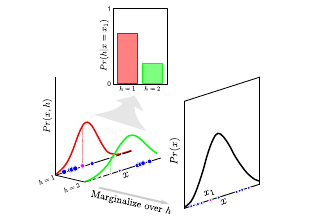

Fig.8 E-step for ﬁtting the mixture of Gaussians model. For each of the I data points x1...I , we calculate the posterior distribution P r(hi |xi ) over the hidden variable hi . The posterior probability P r(hi = k|xi ) that hi takes value k can be understood as the responsibility of normal distribution k for data point xi . For example, for data point x1 (magenta circle), component 1 (red curve) is more than twice as likely to be responsible than component 2 (green curve). Note that in the joint distribution (left), the size of the projected data point indicates the responsibility.

## Mixture of Gaussians as a Marginalization

The mixture of Gaussians model can be expressed as the marginalization of a joint probability distribution between the observed data $ x $ and a discrete hidden variable $ h $ that takes values $ h \in \{1, \dots, K\} $ (Figure 7.7). If we define:

$$
Pr(x|h, \theta) = \text{Norm}_x [\mu_h , \Sigma_h ]
$$

$$
Pr(h|\theta) = \text{Cat}_h [\lambda]
$$

where \( \lambda = [\lambda_1, \dots, \lambda_K] \) are the parameters of the categorical distribution, then we can recover the original density using:

$$
Pr(x|\theta) = \sum_{k=1}^{K} Pr(x, h = k|\theta)
$$

$$
= \sum_{k=1}^{K} Pr(x|h = k, \theta)Pr(h = k|\theta)
$$

$$
= \sum_{k=1}^{K} \lambda_k \text{Norm}_x [\mu_k , \Sigma_k ].
$$

Interpreting the model in this way also provides a method to draw samples from a mixture of Gaussians: we sample from the joint distribution $ Pr(x, h) $, and then discard the hidden variable $ h $ to leave just a data sample $ x $. 

To sample from the joint distribution $ Pr(x, h) $, we:
1. First sample $ h $ from the categorical prior $ Pr(h) $.
2. Then sample $ x $ from the normal distribution $ Pr(x|h) $ associated with the value of $ h $.

Notice that the hidden variable $h $ has a clear interpretation in this procedure; it determines which of the constituent normal distributions is responsible for the observed data point $ x $.

## Fig.8: E-step for Fitting the Mixture of Gaussians Model

For each of the $ I $ data points $ x_1, \dots, x_I $, we calculate the posterior distribution $ Pr(h_i |x_i ) $ over the hidden variable $ h_i $. The posterior probability $ Pr(h_i = k|x_i ) $ that $ h_i $ takes value $ k $ can be understood as the responsibility of normal distribution $ k $ for data point $ x_i $. 

For example, for data point $ x_1 $ (magenta circle), component 1 (red curve) is more than twice as likely to be responsible than component 2 (green curve). Note that in the joint distribution (left), the size of the projected data point indicates the responsibility.

---

## Expectation Maximization for Fitting Mixture Models

To learn the MoG parameters $ \theta = \{ \lambda_k , \mu_k , \Sigma_k \}_{k=1}^{K} $ from training data $# Mixture of Gaussians as a Marginalization

The mixture of Gaussians model can be expressed as the marginalization of a joint probability distribution between the observed data $ x $ and a discrete hidden variable $ h $ that takes values $ h \in \{1, \dots, K\} $ (Fig.7). If we define:

$$
Pr(x|h, \theta) = \text{Norm}_x [\mu_h , \Sigma_h ]
$$

$$
Pr(h|\theta) = \text{Cat}_h [\lambda]
$$

where $ \lambda = [\lambda_1, \dots, \lambda_K] $ are the parameters of the categorical distribution, then we can recover the original density using:

$$
Pr(x|\theta) = \sum_{k=1}^{K} Pr(x, h = k|\theta)
$$

$$
= \sum_{k=1}^{K} Pr(x|h = k, \theta)Pr(h = k|\theta)
$$

$$
= \sum_{k=1}^{K} \lambda_k \text{Norm}_x [\mu_k , \Sigma_k ].
$$

Interpreting the model in this way also provides a method to draw samples from a mixture of Gaussians: we sample from the joint distribution $ Pr(x, h) $, and then discard the hidden variable $ h $ to leave just a data sample $ x $. 

To sample from the joint distribution $ Pr(x, h) $, we:
1. First sample $ h $ from the categorical prior $ Pr(h) $.
2. Then sample $ x $ from the normal distribution $ Pr(x|h) $ associated with the value of $ h $.

Notice that the hidden variable $ h $ has a clear interpretation in this procedure; it determines which of the constituent normal distributions is responsible for the observed data point $ x $.

## Fig.8: E-step for Fitting the Mixture of Gaussians Model

For each of the $ I $ data points $ x_1, \dots, x_I $, we calculate the posterior distribution $ Pr(h_i |x_i ) $ over the hidden variable $ h_i $. The posterior probability $ Pr(h_i = k|x_i ) $ that $ h_i $ takes value $ k $ can be understood as the responsibility of normal distribution $ k $ for data point $ x_i $. 

For example, for data point $ x_1 $ (magenta circle), component 1 (red curve) is more than twice as likely to be responsible than component 2 (green curve). Note that in the joint distribution (left), the size of the projected data point indicates the responsibility.

---

## Expectation Maximization for Fitting Mixture Models

To learn the MoG parameters $ \theta = \{ \lambda_k , \mu_k , \Sigma_k \}_{k=1}^{K} $ from training data $ \{ x_i \}_{i=1}^{I} $, we apply the EM algorithm. Following the recipe of Section 7.3, we initialize the parameters randomly and alternate between performing the E- and M-steps.

### **E-Step**
We maximize the bound with respect to the distributions $ q_i (h_i) $ by finding the posterior probability distribution $ Pr(h_i |x_i ) $ of each hidden variable $ h_i $ given the observation $ x_i $ and the current parameter settings:

$$
q_i (h_i) = Pr(h_i = k|x_i , \theta^{(t)} ) = \frac{Pr(x_i |h_i = k, \theta^{(t)} )Pr(h_i = k, \theta^{(t)} )}{\sum_{j=1}^{K} Pr(x_i |h_i = j, \theta^{(t)} )Pr(h_i = j, \theta^{(t)} )}
$$

$$
= \frac{\lambda_k \text{Norm}_x [\mu_k , \Sigma_k ]}{\sum_{j=1}^{K} \lambda_j \text{Norm}_x [\mu_j , \Sigma_j ]} = r_{ik}.
$$

### **Fig.9: M-step for Fitting the Mixture of Gaussians Model**
For the $ k $th constituent Gaussian, we update the parameters $ \{ \lambda_k , \mu_k , \Sigma_k \} $. The $ i $th data point $ x_i $ contributes to these updates according to the responsibility $ r_{ik} $ (indicated by the size of the point) assigned in the E-step; data points that are more associated with the $ k $th component have more effect on the parameters. Dashed and solid lines represent the fit before and after the update, respectively.

### **M-Step**
We maximize the bound with respect to the parameters \( \theta = \{ \lambda_k , \mu_k , \Sigma_k \}_{k=1}^{K} \) so that:

$$
\theta^{(t+1)} = \arg\max_{\theta} \sum_{i=1}^{I} \sum_{k=1}^{K} r_{ik} \log [\lambda_k \text{Norm}_{x_i} [\mu_k , \Sigma_k ]].
$$

This maximization can be performed by taking the derivative of the expression with respect to the parameters, equating the result to zero, and rearranging, taking care to enforce the constraint:

$$
\sum_{k} \lambda_k = 1
$$

using Lagrange multipliers.
 $\{ x_i \}_{i=1}^{I} $, we apply the EM algorithm. Following the recipe of Section 7.3, we initialize the parameters randomly and alternate between performing the E- and M-steps.

### **E-Step**
We maximize the bound with respect to the distributions $ q_i (h_i) $ by finding the posterior probability distribution $ Pr(h_i |x_i ) $ of each hidden variable $ h_i $ given the observation $ x_i $ and the current parameter settings:

$$
q_i (h_i) = Pr(h_i = k|x_i , \theta^{(t)} ) = \frac{Pr(x_i |h_i = k, \theta^{(t)} )Pr(h_i = k, \theta^{(t)} )}{\sum_{j=1}^{K} Pr(x_i |h_i = j, \theta^{(t)} )Pr(h_i = j, \theta^{(t)} )}
$$

$$
= \frac{\lambda_k \text{Norm}_x [\mu_k , \Sigma_k ]}{\sum_{j=1}^{K} \lambda_j \text{Norm}_x [\mu_j , \Sigma_j ]} = r_{ik}.
$$

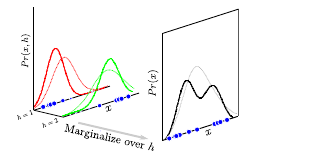   

### **Fig.9: M-step for Fitting the Mixture of Gaussians Model**
For the $ k $th constituent Gaussian, we update the parameters $ \{ \lambda_k , \mu_k , \Sigma_k \} $. The $ i $th data point $ x_i $ contributes to these updates according to the responsibility $ r_{ik} $ (indicated by the size of the point) assigned in the E-step; data points that are more associated with the $ k $th component have more effect on the parameters. Dashed and solid lines represent the fit before and after the update, respectively.

### **M-Step**
We maximize the bound with respect to the parameters $ \theta = \{ \lambda_k , \mu_k , \Sigma_k \}_{k=1}^{K} $ so that:

$$
\theta^{(t+1)} = \arg\max_{\theta} \sum_{i=1}^{I} \sum_{k=1}^{K} r_{ik} \log [\lambda_k \text{Norm}_{x_i} [\mu_k , \Sigma_k ]].
$$

This maximization can be performed by taking the derivative of the expression with respect to the parameters, equating the result to zero, and rearranging, taking care to enforce the constraint:

$$
\sum_{k} \lambda_k = 1
$$

using Lagrange multipliers.


In [7]:
import random
import math

def normal_pdf(x, mean, variance):
    """Computes the probability density function of a normal distribution."""
    coeff = 1 / math.sqrt(2 * math.pi * variance)
    exponent = math.exp(-((x - mean) ** 2) / (2 * variance))
    return coeff * exponent

def initialize_parameters(K, data):
    """Randomly initializes the parameters of the Gaussian mixture model."""
    means = random.sample(data, K)
    variances = [1.0] * K  # Start with unit variance
    weights = [1/K] * K  # Uniform weights
    return means, variances, weights

def expectation_step(data, means, variances, weights, K):
    """E-step: Compute responsibilities."""
    responsibilities = []
    for x in data:
        total = sum(weights[k] * normal_pdf(x, means[k], variances[k]) for k in range(K))
        r = [(weights[k] * normal_pdf(x, means[k], variances[k])) / total for k in range(K)]
        responsibilities.append(r)
    return responsibilities

def maximization_step(data, responsibilities, K):
    """M-step: Update parameters."""
    N_k = [sum(r[k] for r in responsibilities) for k in range(K)]
    
    means = [sum(r[k] * x for r, x in zip(responsibilities, data)) / N_k[k] for k in range(K)]
    variances = [sum(r[k] * (x - means[k])**2 for r, x in zip(responsibilities, data)) / N_k[k] for k in range(K)]
    weights = [N_k[k] / len(data) for k in range(K)]
    
    return means, variances, weights

def has_converged(old_params, new_params, tol=1e-4):
    """Checks convergence by comparing old and new parameters."""
    return all(abs(o - n) < tol for o, n in zip(old_params, new_params))

def em_algorithm(data, K, max_iter=100):
    """Expectation-Maximization algorithm for a 1D Mixture of Gaussians."""
    means, variances, weights = initialize_parameters(K, data)
    
    for _ in range(max_iter):
        old_params = (means.copy(), variances.copy(), weights.copy())
        responsibilities = expectation_step(data, means, variances, weights, K)
        means, variances, weights = maximization_step(data, responsibilities, K)
        
        if has_converged(old_params[0] + old_params[1] + old_params[2], 
                         means + variances + weights):
            break
    
    return means, variances, weights

# Generate synthetic 1D data
random.seed(42)
data = [random.gauss(-2, 1) for _ in range(50)] + [random.gauss(3, 1) for _ in range(50)]

# Fit Mixture of Gaussians with EM
K = 2  # Number of clusters
means, variances, weights = em_algorithm(data, K)

# Print results
print("Final parameters:")
for k in range(K):
    print(f"Gaussian {k+1}: Mean = {means[k]:.2f}, Variance = {variances[k]:.2f}, Weight = {weights[k]:.2f}")


Final parameters:
Gaussian 1: Mean = -2.06, Variance = 0.63, Weight = 0.50
Gaussian 2: Mean = 3.17, Variance = 0.88, Weight = 0.50


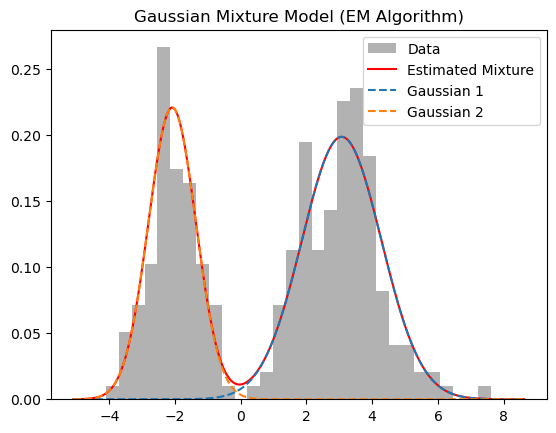

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data
np.random.seed(42)
data = np.concatenate([
    np.random.normal(loc=-2, scale=0.8, size=100),
    np.random.normal(loc=3, scale=1.2, size=150)
])

# Number of Gaussians
K = 2

# Initialize parameters
means = random.sample(list(data), K)
variances = [1.0] * K
weights = [1 / K] * K

# EM algorithm
tolerance = 1e-4
max_iter = 100
for iteration in range(max_iter):
    # E-step: Compute responsibilities
    responsibilities = np.zeros((len(data), K))
    for k in range(K):
        responsibilities[:, k] = weights[k] * norm.pdf(data, means[k], np.sqrt(variances[k]))
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    # M-step: Update parameters
    new_means = np.sum(responsibilities * data[:, np.newaxis], axis=0) / responsibilities.sum(axis=0)
    new_variances = np.sum(responsibilities * (data[:, np.newaxis] - new_means) ** 2, axis=0) / responsibilities.sum(axis=0)
    new_weights = responsibilities.mean(axis=0)

    # Check for convergence
    if np.all(np.abs(new_means - means) < tolerance):
        break

    means, variances, weights = new_means, new_variances, new_weights

# Plot results
x = np.linspace(min(data) - 1, max(data) + 1, 1000)
pdf = sum(weights[k] * norm.pdf(x, means[k], np.sqrt(variances[k])) for k in range(K))

plt.hist(data, bins=30, density=True, alpha=0.6, color='gray', label='Data')
plt.plot(x, pdf, 'r-', label='Estimated Mixture')
for k in range(K):
    plt.plot(x, weights[k] * norm.pdf(x, means[k], np.sqrt(variances[k])), '--', label=f'Gaussian {k+1}')
plt.legend()
plt.title("Gaussian Mixture Model (EM Algorithm)")
plt.show()


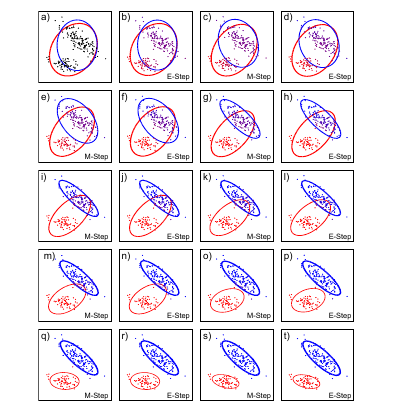

Fig.10 a) Initial model. b) E-step. For each data point the posterior probability that is was generated from each Gaussian is calculated (indicated by color of point). c) M-step. The mean, variance and weight of each Gaussian is updated based on these posterior probabilities. Ellipse shows Mahalanobis distance of two. Weight (thickness) of ellipse indicates weight of Gaussian. d-t) Further E-step and M-step iterations.

### Mixture of Gaussians

The mixture of Gaussians (MoG) is a prototypical example of a model where learning is suited to the EM algorithm. The data are described as a weighted sum of $K$ normal distributions:

$$
P r(x|\theta) = \sum_{k=1}^K \lambda_k \text{Norm}_x [\mu_k , \Sigma_k ], \quad (7.13)
$$

where $\mu_1...\mu_K$ and $\Sigma_1...\Sigma_K$ are the means and covariances of the normal distributions, and $\lambda_1...\lambda_K$ are positive-valued weights that sum to one. The mixture of Gaussians model describes complex multi-modal probability densities by combining simpler constituent distributions (Figure 7.6).

To learn the parameters $\theta = \{\mu_k , \Sigma_k , \lambda_k \}_{k=1}^K$ from training data $\{x_i\}_{i=1}^I$, we could apply the straightforward maximum likelihood approach:

$$
\hat{\theta} = \arg\max_\theta \sum_{i=1}^I \log [P r(x_i |\theta)] \\
= \arg\max_\theta \sum_{i=1}^I \log \left[ \sum_{k=1}^K \lambda_k \text{Norm}_{x_i} [\mu_k , \Sigma_k ] \right]. \quad (7.14)
$$

Unfortunately, if we take the derivative with respect to the parameters $\theta$ and equate the resulting expression to zero, it is not possible to solve the resulting equations in closed form. The sticking point is the summation inside the logarithm, which precludes a simple solution. Of course, we could use a nonlinear optimization approach, but this would be complex as we would have to maintain the constraints on the parameters: the weights $\lambda$ must sum to one, and the covariances $\{\Sigma_k\}_{k=1}^K$ must be positive definite.

For a simpler approach, we express the observed density as a marginalization and use the EM algorithm to learn the parameters.

#### Mixture of Gaussians as a Marginalization

The mixture of Gaussians model can be expressed as the marginalization of a joint probability distribution between the observed data $x$ and a discrete hidden variable $h$ that takes values $h \in \{1, \dots, K\}$ (Figure 7.7). If we define:

$$
P r(x|h, \theta) = \text{Norm}_x [\mu_h , \Sigma_h ] \\
P r(h|\theta) = \text{Cat}_h [\lambda], \quad (7.15)
$$

where $\lambda = [\lambda_1, \dots, \lambda_K]$ are the parameters of the categorical distribution, then we can recover the original density using:

$$
P r(x|\theta) = \sum_{k=1}^K P r(x, h = k|\theta) \\
= \sum_{k=1}^K P r(x|h = k, \theta) P r(h = k|\theta) \\
= \sum_{k=1}^K \lambda_k \text{Norm}_x [\mu_k , \Sigma_k ]. \quad (7.16)
$$

Interpreting the model in this way also provides a method to draw samples from a mixture of Gaussians: we sample from the joint distribution $P r(x, h)$, and then discard the hidden variable $h$ to leave just a data sample $x$. To sample from the joint distribution $P r(x, h)$, we first sample $h$ from the categorical prior $P r(h)$, then sample $x$ from the normal distribution $P r(x|h)$ associated with the value of $h$. Notice that the hidden variable $h$ has a clear interpretation in this procedure; it determines which of the constituent normal distributions is responsible for the observed data point $x$.

### E-Step for Fitting the Mixture of Gaussians Model

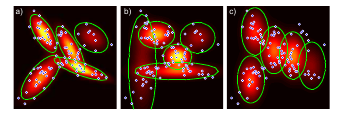

Fig.11 Covariance of components in mixture models. a) Full covari- ances. b) Diagonal covariances. c) Identical diagonal covariances.

For each of the $I$ data points $x_1...x_I$, we calculate the posterior distribution $P r(h_i |x_i)$ over the hidden variable $h_i$. The posterior probability $P r(h_i = k|x_i)$ that $h_i$ takes value $k$ can be understood as the responsibility of normal distribution $k$ for data point $x_i$. For example, for data point $x_1$ (magenta circle), component 1 (red curve) is more than twice as likely to be responsible than component 2 (green curve). Note that in the joint distribution (left), the size of the projected data point indicates the responsibility.

### EM Algorithm for Mixture of Gaussians

The EM algorithm alternates between the E-step and M-step:

1. **E-Step**: For each data point $x_i$, compute the posterior probabilities (responsibilities) $r_{ik}$:

   $$
   r_{ik} = P r(h_i = k|x_i, \theta^{[t]}) = \frac{\lambda_k \text{Norm}_{x_i} [\mu_k^{[t]}, \Sigma_k^{[t]}]}{\sum_{j=1}^K \lambda_j \text{Norm}_{x_i} [\mu_j^{[t]}, \Sigma_j^{[t]}]}. \quad (7.17)
   $$

2. **M-Step**: Update the parameters $\theta$ using the responsibilities:

   - Update the weights $\lambda_k$:

     $$
     \lambda_k^{[t+1]} = \frac{\sum_{i=1}^I r_{ik}}{I}. \quad (7.18)
     $$

   - Update the means $\mu_k$:

     $$
     \mu_k^{[t+1]} = \frac{\sum_{i=1}^I r_{ik} x_i}{\sum_{i=1}^I r_{ik}}. \quad (7.19)
     $$

   - Update the covariances $\Sigma_k$:

     $$
     \Sigma_k^{[t+1]} = \frac{\sum_{i=1}^I r_{ik} (x_i - \mu_k^{[t+1]})(x_i - \mu_k^{[t+1]})^T}{\sum_{i=1}^I r_{ik}}. \quad (7.20)
     $$

These update rules can be easily understood (Figure 7.9): we update the weights $\{\lambda_k\}_{k=1}^K$ according to the relative total responsibility of each component for the data points. We update the cluster means $\{\mu_k\}_{k=1}^K$ by computing the weighted mean over the data points where the weights are given by the responsibilities. If component $k$ is mostly responsible for data point $x_i$, then this data point has a high weight and affects the update more. The update rule for the covariances has a similar interpretation.

In practice, the E- and M-steps are alternated until the bound on the data no longer increases and the parameters no longer change. The alternating E-steps and M-steps for a two-dimensional example are shown in Figure 7.10. Notice that the final fit identifies the two clusters in the data.

### Covariance of Components in Mixture Models

- **Full covariances** (Figure 7.11a): Each component has its own full covariance matrix.
- **Diagonal covariances** (Figure 7.11b): Each component has a diagonal covariance matrix.
- **Identical diagonal covariances** (Figure 7.11c): All components share the same diagonal covariance matrix.

### Mixtures of Gaussians Model for Face Data

Figure 7.12 shows the mean vectors $\mu_k$ for a mixture of ten Gaussians fitted to the face data set. The model has captured variation in the mean luminance and chromaticity of the face and other factors such as the pose and background color. Numbers indicate the weight of each component.

### Local Maxima
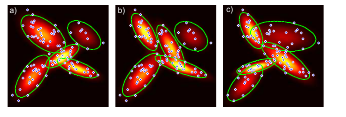

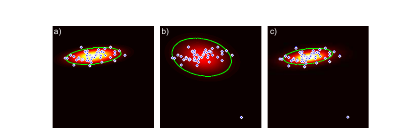
Repeated fitting of the mixture of Gaussians model with different starting points results in different models as the fit converges to different local maxima (Fig.13). The log likelihoods are:

- (a) 98.76
- (b) 96.97
- (c) 94.35,

indicating that (a) is the best fit.

### Motivation for t-Distribution

- **Multivariate normal model** (Figure 7.14a): Fit to data.
- **Outlier effect** (Figure 7.14b): Adding a single outlier completely changes the fit.
- **Multivariate t-distribution** (Figure 7.14c): With the multivariate t-distribution, the outlier does not have such a drastic effect.

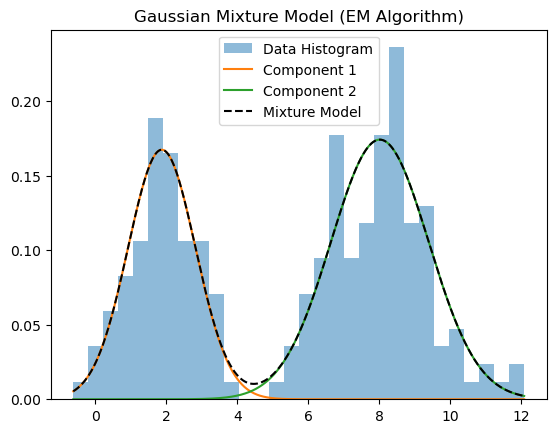

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data from a mixture of Gaussians
np.random.seed(42)
true_means = [2, 8]
true_stds = [1, 1.5]
true_weights = [0.4, 0.6]

samples_1 = np.random.normal(true_means[0], true_stds[0], int(200 * true_weights[0]))
samples_2 = np.random.normal(true_means[1], true_stds[1], int(200 * true_weights[1]))
data = np.hstack([samples_1, samples_2])
np.random.shuffle(data)

# Initialize GMM parameters
K = 2  # Number of Gaussians
means = np.random.choice(data, K)
stds = np.random.rand(K)
weights = np.ones(K) / K

# EM Algorithm
n_iterations = 50
responsibilities = np.zeros((len(data), K))

for step in range(n_iterations):
    # E-step: Compute responsibilities
    for k in range(K):
        responsibilities[:, k] = weights[k] * norm.pdf(data, means[k], stds[k])
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    
    # M-step: Update parameters
    for k in range(K):
        Nk = responsibilities[:, k].sum()
        means[k] = (responsibilities[:, k] @ data) / Nk
        stds[k] = np.sqrt((responsibilities[:, k] @ (data - means[k])**2) / Nk)
        weights[k] = Nk / len(data)

# Plot results
x_range = np.linspace(min(data), max(data), 1000)
gmm_pdf = sum(weights[k] * norm.pdf(x_range, means[k], stds[k]) for k in range(K))

plt.hist(data, bins=30, density=True, alpha=0.5, label='Data Histogram')
for k in range(K):
    plt.plot(x_range, weights[k] * norm.pdf(x_range, means[k], stds[k]), label=f'Component {k+1}')
plt.plot(x_range, gmm_pdf, 'k--', label='Mixture Model')
plt.legend()
plt.title('Gaussian Mixture Model (EM Algorithm)')
plt.show()


In [11]:
import random
import math

# Generate synthetic data from two Gaussians
def gaussian_sample(mean, std, n):
    """ Generate n samples from a Gaussian distribution using the Box-Muller transform. """
    samples = []
    for _ in range(n):
        u1, u2 = random.random(), random.random()
        z = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        samples.append(mean + std * z)
    return samples

# Generate data
data = gaussian_sample(10, 2, 100) + gaussian_sample(20, 3, 100)

# Initialize parameters randomly
mu1, mu2 = random.choice(data), random.choice(data)
sigma1, sigma2 = random.uniform(1, 5), random.uniform(1, 5)
lambda1, lambda2 = 0.5, 0.5  # Equal initial weights
def plot_histogram(data, bins=20, width=50):
    """ ASCII histogram plot for 1D data """
    min_x, max_x = min(data), max(data)
    bin_size = (max_x - min_x) / bins

    # Count number of points in each bin
    counts = [0] * bins
    for x in data:
        index = int((x - min_x) / bin_size)
        if index == bins:  # Edge case for max value
            index -= 1
        counts[index] += 1

    # Normalize counts to fit in `width` characters
    max_count = max(counts)
    if max_count > 0:
        counts = [int((c / max_count) * width) for c in counts]

    # Print histogram
    for i in range(bins):
        x_label = f"{min_x + i * bin_size:.1f}".rjust(6)
        print(f"{x_label} | " + "#" * counts[i])

# Generate and plot data
data = gaussian_sample(10, 2, 100) + gaussian_sample(20, 3, 100)
plot_histogram(data)

# Gaussian probability density function
def gaussian(x, mean, std):
    coeff = 1 / (std * math.sqrt(2 * math.pi))
    exponent = math.exp(-((x - mean) ** 2) / (2 * std**2))
    return coeff * exponent

# EM Algorithm
for iteration in range(10):  # Run for 10 iterations
    # E-Step: Compute responsibilities
    responsibilities = []
    for x in data:
        p1 = lambda1 * gaussian(x, mu1, sigma1)
        p2 = lambda2 * gaussian(x, mu2, sigma2)
        total = p1 + p2
        r1, r2 = p1 / total, p2 / total
        responsibilities.append((r1, r2))

    # M-Step: Update parameters
    sum_r1 = sum(r[0] for r in responsibilities)
    sum_r2 = sum(r[1] for r in responsibilities)
    
    mu1 = sum(r[0] * x for r, x in zip(responsibilities, data)) / sum_r1
    mu2 = sum(r[1] * x for r, x in zip(responsibilities, data)) / sum_r2

    sigma1 = math.sqrt(sum(r[0] * (x - mu1) ** 2 for r, x in zip(responsibilities, data)) / sum_r1)
    sigma2 = math.sqrt(sum(r[1] * (x - mu2) ** 2 for r, x in zip(responsibilities, data)) / sum_r2)

    lambda1 = sum_r1 / len(data)
    lambda2 = sum_r2 / len(data)

    # Print progress
    print(f"Iteration {iteration+1}:")
    print(f"  Mu1: {mu1:.2f}, Sigma1: {sigma1:.2f}, Lambda1: {lambda1:.2f}")
    print(f"  Mu2: {mu2:.2f}, Sigma2: {sigma2:.2f}, Lambda2: {lambda2:.2f}")

print("\nFinal Parameters:")
print(f"Mu1: {mu1:.2f}, Sigma1: {sigma1:.2f}, Lambda1: {lambda1:.2f}")
print(f"Mu2: {mu2:.2f}, Sigma2: {sigma2:.2f}, Lambda2: {lambda2:.2f}")


   5.6 | #######
   6.6 | ###############
   7.6 | #########################
   8.7 | ##################################################
   9.7 | ######################################
  10.8 | ##########################
  11.8 | ###############
  12.9 | #############
  13.9 | #######
  15.0 | #############
  16.0 | ###################
  17.1 | #####################
  18.1 | ##############################
  19.2 | #################
  20.2 | ############################
  21.3 | ###################
  22.3 | #########
  23.4 | #############
  24.4 | #######
  25.5 | ###
Iteration 1:
  Mu1: 15.77, Sigma1: 5.25, Lambda1: 0.44
  Mu2: 13.89, Sigma2: 5.53, Lambda2: 0.56
Iteration 2:
  Mu1: 15.76, Sigma1: 5.46, Lambda1: 0.44
  Mu2: 13.90, Sigma2: 5.37, Lambda2: 0.56
Iteration 3:
  Mu1: 15.79, Sigma1: 5.53, Lambda1: 0.44
  Mu2: 13.88, Sigma2: 5.30, Lambda2: 0.56
Iteration 4:
  Mu1: 15.83, Sigma1: 5.55, Lambda1: 0.44
  Mu2: 13.85, Sigma2: 5.27, Lambda2: 0.56
Iteration 5:
  Mu1: 15.88, Sigma1: 5.

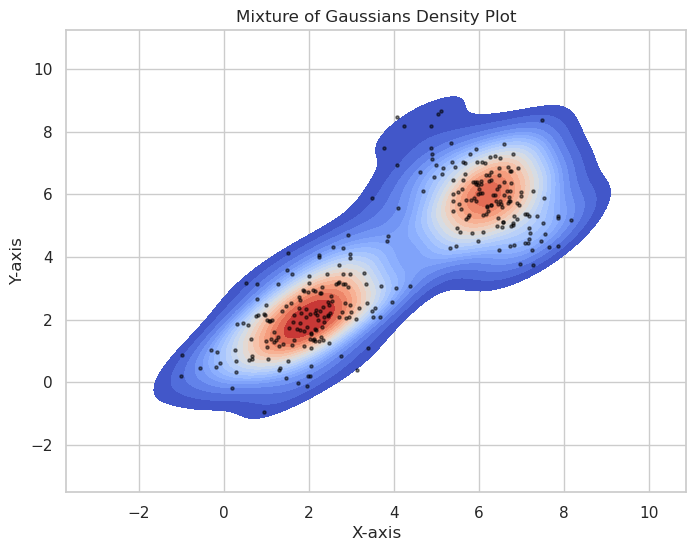

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal



def generate_gaussian_mixture(n_samples=300, means=[(2, 2), (6, 6)], covs=[[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]], weights=[0.5, 0.5]):
    np.random.seed(42)
    n_components = len(means)
    samples = []
    
    for i in range(n_samples):
        component = np.random.choice(n_components, p=weights)
        sample = np.random.multivariate_normal(means[component], covs[component])
        samples.append(sample)
    
    return np.array(samples)

data = generate_gaussian_mixture()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.kdeplot(x=data[:, 0], y=data[:, 1], cmap="coolwarm", fill=True, levels=20)
plt.scatter(data[:, 0], data[:, 1], s=5, alpha=0.5, color="black")
plt.title("Mixture of Gaussians Density Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()
